# Analysis of the the single intein
This notebook is for conducting analysis on the **Thiol sensitive intein** (Abbreviated TSI).

## Installing and importing the necessary libraries

In [38]:
# installing the libraries 
# uncomment the lines below to make sure that the required libraries are installed
# install.packages("tidyverse")
# install.packages("ggthemes")
# install.packages("ggplot2")
# install.packages("dplyr")

# importing the libraries
library(tidyverse)
library(ggthemes)
library(ggplot2)
library(dplyr)
library(glue)

## Reading the csv file that has the results of the simulation

In [3]:
intein <- read_csv("intein.csv")
head(intein)

Rows: 3440 Columns: 15
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): type, previous_aa, new_aa_1l, new_aa_3l, conversion, new_seq, secon...
dbl (8): residue_number, fa_score, ddg_score, hbond_score, sasa_score, diff_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,new_seq,fa_score,ddg_score,hbond_score,sasa_score,secondary_structure,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,NA,NA,ASITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,362.1068,0.00000,104,8580.714,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,0.0000000,0
mutant,1,A,C,CYS,1AtoC,CSITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,413.7276,51.62086,104,8599.590,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,18.8757359,0
mutant,1,A,D,ASP,1AtoD,DSITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,446.3807,84.27391,104,8596.750,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,16.0355577,0
mutant,1,A,E,GLU,1AtoE,ESITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,653.4236,291.31682,104,8585.626,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,4.9110617,0
mutant,1,A,F,PHE,1AtoF,FSITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,603.7107,241.60395,104,8609.113,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,28.3985160,0
mutant,1,A,G,GLY,1AtoG,GSITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,381.2703,19.16354,104,8580.383,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,-0.3310385,0


#### Increasing readability 
Removing the new_seq and secondary sequence of the file to incrase readability.

In [9]:
intein_short <- intein |> select(-c(new_seq, secondary_structure))
head(intein_short)

type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,NA,NA,362.1068,0.00000,104,8580.714,0,0.0000000,0
mutant,1,A,C,CYS,1AtoC,413.7276,51.62086,104,8599.590,0,18.8757359,0
mutant,1,A,D,ASP,1AtoD,446.3807,84.27391,104,8596.750,0,16.0355577,0
mutant,1,A,E,GLU,1AtoE,653.4236,291.31682,104,8585.626,0,4.9110617,0
mutant,1,A,F,PHE,1AtoF,603.7107,241.60395,104,8609.113,0,28.3985160,0
mutant,1,A,G,GLY,1AtoG,381.2703,19.16354,104,8580.383,0,-0.3310385,0


## General Analysis
A general analysis of all of the mutations. In section of analysis no grouping has been done and single mutation are analyzed individually. 

### Delta Delta G Analysis 
Creating a histogram of DDG. Wildtype value is 0 as all of the ddg score all calculated relative to wild-type
> Unlike the `docked_analysis` notebook where there were some mutations that resulted in a lower ΔΔG, such mutation is not observed here. There are **two interesting patterns** here. Firstly, it seems that the **majority of the mutations are not changing ΔΔG** and **the ones that are changing it are only increaseing the ΔΔG**

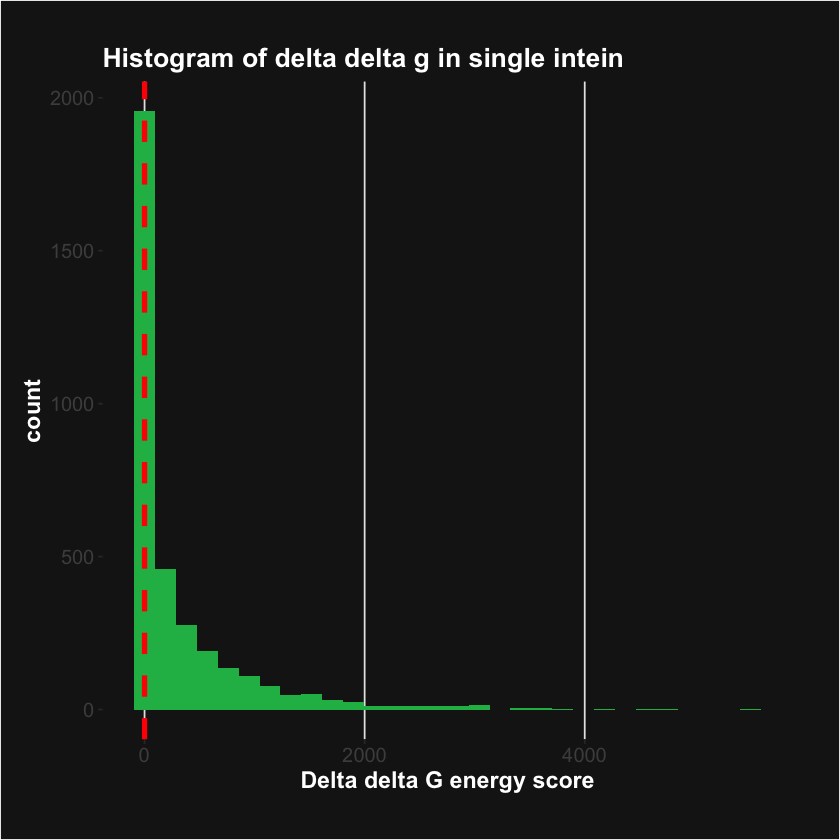

In [138]:
wildtype_ddg <- (intein_short |> filter(type == "wild_type"))$ddg_score
intein_short |> ggplot(aes(ddg_score)) + 
    geom_histogram(fill = "#1DB954", bins = 30) + 
    theme(plot.title = element_text(hjust = 0, size = 16, face = "bold", color = "white"),
        axis.title = element_text(size = 14, face = "bold", color = "white"),
        axis.text = element_text(size = 12),
        plot.background = element_rect(fill = "#191919"),
        panel.background = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_line(color = "gray90", size = 0.5),
        panel.grid.minor.x = element_blank()) +
  ggtitle("Histogram of delta delta g in single intein") +
  labs(x = "Delta delta G energy score", y = "count") +
  geom_vline(xintercept = wildtype_ddg, color = "red", size = 1.5, linetype = "dashed") +
  theme(plot.margin = unit(c(1, 1, 1, 0.5), "cm"))

#### Taking a look at the higher end
Let's see if we can find a pattern on ΔΔG scores higher than `2000`. The data can be found in the cell below.

**With regard to previous amino acid:**
> It seems that the **previous amino acid A is considerably common here**. **34 out of 85 amino acids** (of mutations with ΔΔG scores higher than `2000`) were the ones that the mutated amino acid was A. In other words, **amino acid A was the one that was being replaced**. 

**With regard to new amino acid:**
> When **amino acids P or W are added** as a result of the point mutation, the **ΔΔG score was spiked.** These two amino acids are responsible for **61 out 85 mutations** in the filtered data frame. 

*Combining both of the data above:*
> In 40 of the mutation in 85 (85 mutations with ΔΔG > 2000) an amino acids was converted to P. However, **in none of those mutations A was converted to P** which in first glance may seem ordinary because both **A and P are in the same amino acid group** (Amino acids with a nonpolar R group). **W is also in this group but conversion of A -> W is observed among the 85**.

So what happens when A -> P?

In [70]:
ddg_above_3000 <- intein_short |> filter(ddg_score > 2000) |> arrange(desc(ddg_score))
ddg_above_3000 |> head(n = 10) #showing only the top 10 
print("****************")
print("Table below shows the count of previous_aa in this filtered data")
table(ddg_above_3000$previous_aa)
glue("This filtered data frame has {ddg_above_3000 |> nrow()} rows")
print("****************")
print("Table below shows the count of new_aa_1l in this filtered data. The amino acids that is being added instead of the wild-type amino acid at a particular position")
table(ddg_above_3000$new_aa_1l)
print("****************")
print("Table below takes a look at all of the mutated sequences with ΔΔG > 2000 where A was replaced. The table counts what was put in the place of A")
table((ddg_above_3000 |> filter(previous_aa == "A"))$new_aa_1l)

type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,132,A,W,TRP,132AtoW,5813.795,5451.688,104,8575.758,0,-4.9563240,0
mutant,148,K,P,PRO,148KtoP,5153.361,4791.254,104,8581.174,0,0.4598051,0
mutant,7,A,W,TRP,7AtoW,4970.983,4608.876,104,8580.268,0,-0.4468043,0
mutant,164,R,P,PRO,164RtoP,4513.665,4151.558,103,8581.808,-1,1.0936000,2
mutant,155,A,W,TRP,155AtoW,4254.719,3892.613,104,8576.253,0,-4.4617985,0
mutant,110,A,W,TRP,110AtoW,4057.646,3695.539,104,8582.607,0,1.8925342,0
mutant,133,K,P,PRO,133KtoP,3947.401,3585.294,104,8550.383,0,-30.3313091,0
mutant,50,R,P,PRO,50RtoP,3926.097,3563.990,103,8538.889,-1,-41.8252796,0
mutant,132,A,Y,TYR,132AtoY,3913.528,3551.421,104,8578.710,0,-2.0048015,0


[1] "****************"
[1] "Table below shows the count of previous_aa in this filtered data"



 A  C  D  E  G  H  I  K  L  N  P  Q  R  S  V  Y 
34  1  1  2  1  1  9  4 13  1  1  2 10  3  1  1 

This filtered data frame has 85 rows

[1] "****************"
[1] "Table below shows the count of new_aa_1l in this filtered data. The amino acids that is being added instead of the wild-type amino acid at a particular position"



 F  H  P  W  Y 
 9  4 41 20 11 

[1] "****************"
[1] "Table below takes a look at all of the mutated sequences with ΔΔG > 2000 where A was replaced. The table counts what was put in the place of A"



 F  H  W  Y 
 9  4 10 11 

#### what happens when A -> P?
A examination of the ΔΔG values when a wildtype A is converted to P as a result of a point mutation. Considering that the **standard deviation** of the `ddg_score` is **570** and the **mean** of `ddg_score` is **317**.  
> it would seem that across 21 mutation the **ΔΔG value does increase** in such event. Furthermore, **all but one of the mutations fall within the the standard deviation**.

In [69]:
ddg_sd <- sd(intein_short$ddg_score)
ddg_mean <- mean(intein_short$ddg_score)
a_to_p <- intein_short |> filter(previous_aa == "A" & new_aa_1l == "P") |> arrange(desc(ddg_score))
a_to_p |> head(n = 8)

type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,132,A,P,PRO,132AtoP,939.0769,576.9701,103,8580.342,-1,-0.3719646,0
mutant,125,A,P,PRO,125AtoP,791.1361,429.0294,103,8579.462,-1,-1.2519596,2
mutant,85,A,P,PRO,85AtoP,785.6410,423.5342,104,8580.588,0,-0.1259740,0
mutant,155,A,P,PRO,155AtoP,763.7951,401.6883,103,8580.330,-1,-0.3843060,0
mutant,136,A,P,PRO,136AtoP,719.8438,357.7370,103,8576.836,-1,-3.8785250,2
mutant,110,A,P,PRO,110AtoP,718.0839,355.9771,103,8580.535,-1,-0.1789855,3
mutant,10,A,P,PRO,10AtoP,707.4821,345.3753,103,8581.068,-1,0.3531538,0
mutant,61,A,P,PRO,61AtoP,698.6412,336.5344,103,8572.492,-1,-8.2222616,3


### Solvent Accessible Surface Area (SASA hereafter) analysis
Let's commence again by drawing a histogram. The red line indicates wild-type.
**Mean** of SASA is **8584**. **Standard deviation** is **20**. 
> the distribution seems to be normal

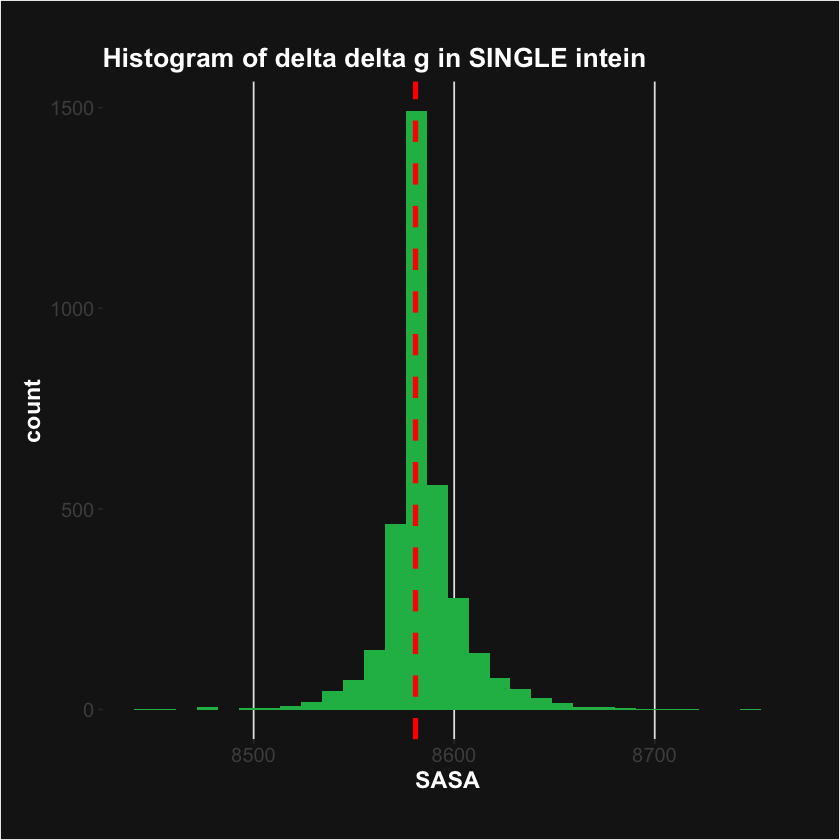

In [103]:
wildtype_sasa <- (intein_short |> filter(type == "wild_type"))$sasa_score
sasa_mean <- mean(intein_short$sasa_score)
sasa_sd <- sd(intein_short$sasa_score)
intein_short |> ggplot(aes(sasa_score)) + 
    geom_histogram(fill = "#1DB954", bins = 30) + 
    theme(plot.title = element_text(hjust = 0, size = 16, face = "bold", color = "white"),
        axis.title = element_text(size = 14, face = "bold", color = "white"),
        axis.text = element_text(size = 12),
        plot.background = element_rect(fill = "#191919"),
        panel.background = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_line(color = "gray90", size = 0.5),
        panel.grid.minor.x = element_blank()) +
  ggtitle("Histogram of delta delta g in SINGLE intein") +
  labs(x = "SASA", y = "count") +
  geom_vline(xintercept = wildtype_sasa, color = "red", size = 1.5, linetype = "dashed") +
  theme(plot.margin = unit(c(1, 1, 1, 0.5), "cm"))

#### A look at the higher end of SASA
looking at mutations with `sasa_score` value above `Mean + 2SD`. There are 131 mutations that are higher than `Mean + 2SD`.

**With respect to `residue_number`:**
> Across 131 mutations, in `residue_number` **142**, **15 mutations are more than *2SD higher than the mean***. `residue_number` **111**, also has **9 mutations** that are considerably **high is their `sasa_score`**

**With respect to `previous_aa`:**
> Across 131 mutations, mutation of **G to another amino acid** accounts for **32** of these 131 mutations

**With respect to `new_aa_1l`:**
> Across 131 mutations, the **point mutation and conversion of previous amino acid to W**, accounts for **37** of them and **conversion to Y**, accounts for **21** of them.

**With respect to highest `sasa_score`s:**
> Across 131 mutations, the **highest 7 values** are **mutations where an amino acid was changed to W**

In [130]:
high_end_sasa <- intein_short |> filter(sasa_score > (sasa_mean + 2* sasa_sd)) |> arrange(desc(sasa_score))
print("****************************************")
print("Below is: Count of residue number with sasa_scores higher than mean + 2SD")
table(high_end_sasa$residue_number)
print("****************************************")
print("****************************************")
print("Below is: Count of previous amino acids with sasa_scores higher than mean + 2SD")
table(high_end_sasa$previous_aa)
print("****************************************")
print("****************************************")
print("Below is: Count of new amino acids added as a result of point-mutation with sasa_scores higher than mean + 2SD")
table(high_end_sasa$new_aa_1l)
print("****************************************")
high_end_sasa |> head(n = 5) # a look at the top values 

[1] "****************************************"
[1] "Below is: Count of residue number with sasa_scores higher than mean + 2SD"



  1  13  14  24  25  28  29  33  35  39  41  45  55  58  67  74  75  82  84  85 
  1   2   1   3   6   1   1   5   1   1   1   4   1   3   4   1   1   1   1   2 
 86  87  92  96 101 111 112 113 114 115 120 122 128 129 130 131 133 137 140 142 
  1   1   4   3   1   9   3   1   2   1   1   1   4   1   5   3   1   2   1  15 
143 144 145 146 156 157 159 161 166 168 172 177 
  1   2   3   4   2   1   2   4   1   7   2   1 

[1] "****************************************"
[1] "****************************************"
[1] "Below is: Count of previous amino acids with sasa_scores higher than mean + 2SD"



 A  D  E  F  G  K  L  N  P  R  S  T  V  W  Y 
16 11  2 15 32  1  1  2 18  6  3  2  7  4 11 

[1] "****************************************"
[1] "****************************************"
[1] "Below is: Count of new amino acids added as a result of point-mutation with sasa_scores higher than mean + 2SD"



 A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  Y 
 5  2  1  1 12 10 10  4  3  4  4  2  1  1  3  4  4  2 37 21 

[1] "****************************************"


type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,142,G,W,TRP,142GtoW,385.9456,23.83883,104,8743.430,0,162.7157,0
mutant,168,A,W,TRP,168AtoW,391.5106,29.40378,104,8718.961,0,138.2463,0
mutant,33,A,W,TRP,33AtoW,378.0919,15.98515,104,8712.477,0,131.7624,0
mutant,130,P,W,TRP,130PtoW,375.8282,13.72136,104,8705.236,0,124.5212,0
mutant,67,G,W,TRP,67GtoW,1185.2647,823.15794,104,8697.965,0,117.2507,0


#### A look at the lower end of SASA
Looking at the values that are with `sasa_score` less than `Mean - 2SD`. There are a **total of 81 mutations** whose mutations result in `sasa_score` below the aforementioned value. 


**With respect to `residue_number`:**
> Among the 81 mutations, **15 of these mutations are occuring at position 69**.

**With respect to `previous_aa`:**
> Among the 81 mutations, **52 mutations are happening and replacing the amino acid R**. In other words, in 52 out of 81 mutations amino acid R is being replaced.

**With respect to `new_aa_1l`:**
> Among the 81 mutations, in 10 of them amino acid G is replacing an amino acid and in 9 of them A is replacing an aa. That said, there does not seem to be a considerable pattern here. 

**With respect to the lowest `sasa_score`:**
> Among the 81 mutations, the lowest `sasa_score` with the value 8441 which is **140 less than wild-type** is associated with `residue_number` **27** in which the **R -> G**. In fact, it notable that the lowest 8 `sasa_score`s are associated with `residue_number` **27**

In [141]:
low_end_sasa <- intein_short |> filter(sasa_score < (sasa_mean - 2 * sasa_sd)) |> arrange(sasa_score)
print("****************************************")
print("Below is: Count of residue number with sasa_scores less than mean + 2SD")
table(low_end_sasa$residue_number)
print("****************************************")

print("****************************************")
print("Below is: Count of previous amino acids with sasa_scores lower than mean + 2SD")
table(low_end_sasa$previous_aa)
print("****************************************")

print("****************************************")
print("Below is: Count of new amino acids added as a result of point-mutation with sasa_scores lower than mean + 2SD")
table(low_end_sasa$new_aa_1l)
print("****************************************")

low_end_sasa |> head(n = 10)

[1] "****************************************"
[1] "Below is: Count of residue number with sasa_scores less than mean + 2SD"



 13  15  27  50  69  83  99 113 114 118 120 121 124 133 137 
  5   2  17  10  15   2   3   1   2   5   1  10   1   5   2 

[1] "****************************************"
[1] "****************************************"
[1] "Below is: Count of previous amino acids with sasa_scores lower than mean + 2SD"



 D  E  G  K  R  T  V 
 4  8  5  8 52  1  3 

[1] "****************************************"
[1] "****************************************"
[1] "Below is: Count of new amino acids added as a result of point-mutation with sasa_scores lower than mean + 2SD"



 A  C  D  E  F  G  H  I  L  M  N  P  Q  R  S  T  V  W  Y 
 9  4  4  2  5 10  4  4  3  1  4  4  1  2  5  5  6  5  3 

[1] "****************************************"


type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,27,R,G,GLY,27RtoG,361.4102,-0.6965943,104,8441.057,0,-139.65768,0
mutant,27,R,A,ALA,27RtoA,360.3311,-1.7757177,104,8454.363,0,-126.35182,0
mutant,27,R,S,SER,27RtoS,360.4039,-1.7028958,104,8457.218,0,-123.49611,0
mutant,27,R,T,THR,27RtoT,370.8806,8.7738168,104,8471.986,0,-108.72848,0
mutant,27,R,D,ASP,27RtoD,361.6544,-0.4524070,104,8472.499,0,-108.21526,0
mutant,27,R,C,CYS,27RtoC,363.6196,1.5127861,104,8476.388,0,-104.32688,0
mutant,27,R,N,ASN,27RtoN,364.0720,1.9652079,104,8479.350,0,-101.36464,0
mutant,27,R,V,VAL,27RtoV,437.2817,75.1748764,104,8479.797,0,-100.91732,0
mutant,121,R,G,GLY,121RtoG,358.2647,-3.8420736,104,8496.197,0,-84.51697,0
